<a href="https://colab.research.google.com/github/kussy29/machine_learning/blob/main/lab03_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**

-------------------------------

In this assignment, you will explore the concept of **classification thresholds** in **Logistic Regression** and investigate whether the commonly used threshold of **0.5** is always the optimal choice. To complete this assignment, you will need to conduct **additional reading** on **ROC curves** and the **AUC metric**, beyond the materials covered in class.

This exercise focuses on the **importance of threshold selection** and how it impacts model performance based on different evaluation criteria.



## **The Objective**

**Is a 0.5 threshold always the best choice in Logistic Regression?**

- Analyze if the standard threshold of **0.5** always yields the most desirable results in various scenarios.
- Investigate alternative thresholds and how they can improve model performance depending on the problem context.



## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

 **Higher threshold gives us less positives (true and false), so it gives higher specifity and lower sensitivity.**

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

   **It depends on the context if we want to avoid false negatives like in spam filtering we would have lower threshold. However if we don't want to have false positive (for example if it would be the decising factor for risky operation) we would rise threshold.**

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

   **One axis of ROC is TPR and another one is FPR which provides us information about trade-off**


4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

   **We can decide that we want to have some minimum level of sensivity/specifity and maximize another one. Another method is to have some function of sensivity and specivity and maximize it.**

   

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.

   **AUC is metric which tells us if we can achieve high sensivity even with high threshold and high specifity with low threshold. If we can do that the model is really good and AUC is high.**



## **Tasks & Deliverables**

1. **Colab Notebook**
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

2. **Answer the Questions:**
   - Use markdown cells to provide explanations.
   - Answer all helper questions with supporting evidence from your plots and results.

3. **Visualizations:**
   - **ROC curve** based on the **validation** set with threshold points marked.
   - Highlight the **optimal threshold** on the ROC curve.

4. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


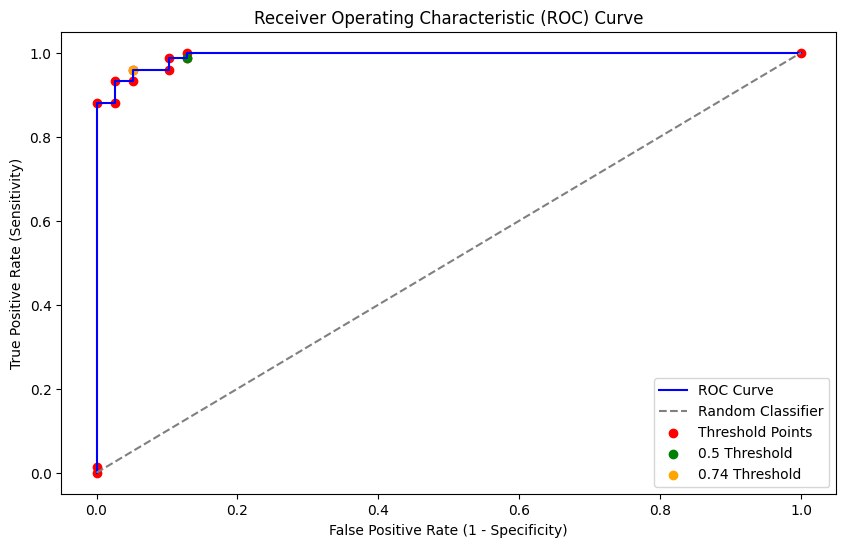

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import  roc_curve, auc
from sklearn.datasets import load_breast_cancer

np.random.seed(85)

data = load_breast_cancer()
X=data.data
y=data.target

ind = np.arange(len(y))
np.random.shuffle(ind)
X_train = X[ind[:int(0.7*len(y))],:]
X_val = X[ind[int(0.7*len(y)):int(0.9*len(y))],:]
X_test = X[ind[int(0.9*len(y)):],:]
y_train = y[ind[:int(0.7*len(y))]]
y_val = y[ind[int(0.7*len(y)):int(0.9*len(y))]]
y_test = y[ind[int(0.9*len(y)):]]

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
pred_val = logistic_model.predict_proba(X_val)[:, 1]
pred_test = logistic_model.predict_proba(X_test)[:,1]

fpr, tpr, threshold=roc_curve(y_val, pred_val)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')
plt.scatter(fpr, tpr, color='red', label='Threshold Points')
plt.scatter(fpr[9], tpr[9], color='green', label='0.5 Threshold')
plt.scatter(fpr[6], tpr[6], color='orange', label='0.74 Threshold')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
print(f'for threshold :{threshold[9]:.3f}')
print(f'True Positive Rate: {tpr[9]:.3f}')
print(f'False Positive Rate: {fpr[9]:.3f}')

print(f'for threshold :{threshold[6]:.3f}')
print(f'True Positive Rate: {tpr[6]:.3f}')
print(f'False Positive Rate: {fpr[6]:.3f}')

print(f'AUC: {roc_auc:.3f}')

t


for threshold :0.492
True Positive Rate: 0.987
False Positive Rate: 0.128
for threshold :0.736
True Positive Rate: 0.960
False Positive Rate: 0.051
AUC: 0.993


As we can see from AUC the classification is really good, because big AUC means that we quickly have high True Positive and low False Positive Rate.

If we want lower FPR than 0.128 we would decide to have higher than 0.492 threshold and if we want higher TPR than 0.987 we would go for lower threshold than 0.492.

Let's see which threshold has the highest TPR-FPR.

In [ ]:
maxi=np.argmax(tpr-fpr)

print(f'for threshold :{threshold[maxi]:.3f} it has the best TPR-FPR {(tpr-fpr)[maxi]:.3f}')
print(f'True Positive Rate: {tpr[maxi]:.3f}')
print(f'False Positive Rate: {fpr[maxi]:.3f}')

for threshold :0.736 it has the best TPR-FPR 0.909
True Positive Rate: 0.960
False Positive Rate: 0.051


## Tests

We will go with 0.5 and 0.74 threshold for our tests.


### Threshold 0.5:

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

pred_test = logistic_model.predict_proba(X_test)[:,1]

print('for threshold 0.5')
print(f'Accuracy: {accuracy_score(y_test, pred_test>0.5):.3f}')
print(f'Precision: {precision_score(y_test, pred_test>0.5):.3f}')
print(f'Recall: {recall_score(y_test, pred_test>0.5):.3f}')
print(f'F1-score: {f1_score(y_test, pred_test>0.5):.3f}')
print('Confusion Matrix:')
conf_mat=confusion_matrix(y_test, pred_test>0.5)
print(conf_mat)
print(f'Sensitivity: {conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0]):.3f}')
print(f'Specificity: {conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1]):.3f}')


for threshold 0.5
Accuracy: 0.947
Precision: 0.944
Recall: 0.971
F1-score: 0.958
Confusion Matrix:
[[20  2]
 [ 1 34]]
Sensitivity: 0.971
Specificity: 0.909


### Threshold 0.74

In [ ]:
print('for threshold 0.74')
print(f'Accuracy: {accuracy_score(y_test, pred_test>0.74):.3f}')
print(f'Precision: {precision_score(y_test, pred_test>0.74):.3f}')
print(f'Recall: {recall_score(y_test, pred_test>0.74):.3f}')
print(f'F1-score: {f1_score(y_test, pred_test>0.74):.3f}')
print('Confusion Matrix:')
conf_mat=confusion_matrix(y_test, pred_test>0.74)
print(conf_mat)
print(f'Sensitivity: {conf_mat[1,1]/(conf_mat[1,1]+conf_mat[1,0]):.3f}')
print(f'Specificity: {conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1]):.3f}')

for threshold 0.74
Accuracy: 0.947
Precision: 0.944
Recall: 0.971
F1-score: 0.958
Confusion Matrix:
[[20  2]
 [ 1 34]]
Sensitivity: 0.971
Specificity: 0.909


For both thresholds we have same results with one false negative (out of 35) and 2 false positives (out of 22). As we can see model have great accuracy , precision, recall (sensitivity), F1-score and only specificity is only 0.91.

In [ ]:
negatives = list(y).count(0)
positives = list(y).count(1)

print(f'Number of negatives: {negatives}')
print(f'Number of positives: {positives}')
print(f'Percantage of positives: {positives/(negatives+positives):.3f}')

Number of negatives: 212
Number of positives: 357
Percantage of positives: 0.627


As we can see data has tendency to label positives with 62% of labels being positive so that's why I think optimal threshold is higher than 0.5.